In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from ydata_profiling import ProfileReport

%matplotlib inline

In [2]:
df = pd.read_csv('online_shoppers_intention.csv') #подключаем датасет

In [3]:
df.head() #выводим первые строки датасета

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.info() #получаем типы данных столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
df.isnull().sum() #проверяем наличие пустых значений


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
len(df.columns) #получаем количество столбцов

18

In [13]:
df.describe()  #основные статистические характеристики

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [15]:
#Исключаем столбцы Administrative, Informational, 'ProductRelated' 
#так как общее количество посещенных пользователем страниц уже хранится в столбце PageValues


In [17]:
df = df.drop(['Administrative', 'Informational', 'ProductRelated'], axis=1)

In [19]:
len(df.columns)

15

In [21]:
#Преобразуем категориальные пременные в числовой формат

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
categorical_columns=['Weekend','Revenue']
for col in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    print('Column:', col)
    print('Original categories:', encoder.classes_)
    print('Encoded values:', encoder.transform(encoder.classes_))
    print('\n')
    df[col] = encoder.fit_transform(df[col])

Column: Weekend
Original categories: [False  True]
Encoded values: [0 1]


Column: Revenue
Original categories: [False  True]
Encoded values: [0 1]




In [27]:
df['Month'] = df['Month'].map({'Jan':1,'Feb': 2, 'Mar': 3, 'May': 5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [29]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


In [31]:
# определим дублированные данные
df.duplicated().value_counts()

False    12157
True       173
Name: count, dtype: int64

In [33]:
#найдено 173 дубликата

In [35]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows) #просмотрим дублирующиеся записи

       Administrative_Duration  Informational_Duration  \
158                        0.0                     0.0   
159                        0.0                     0.0   
178                        0.0                     0.0   
330                        0.0                     0.0   
356                        0.0                     0.0   
...                        ...                     ...   
11939                      0.0                     0.0   
12159                      0.0                     0.0   
12180                      0.0                     0.0   
12185                      0.0                     0.0   
12301                      0.0                     0.0   

       ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
158                        0.0          0.2        0.2         0.0   
159                        0.0          0.2        0.2         0.0   
178                        0.0          0.2        0.2         0.0   
330                    

In [37]:
#удалим дублирующиеся записи так как они могут повлиять на точность модели

In [39]:
df.drop_duplicates(inplace=True)

In [41]:
cols_to_scale = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
#приведем значения к диапазону от 0 до 1, для приведения данных к общему масштабу


In [43]:
import pandas as pd

# Группировка данных по типу трафика
grouped_data = df.groupby('TrafficType')

# Рассчитаем средний доход по типу трафика
average_revenue = grouped_data['Revenue'].mean()

# Рассчитаем общий доход по типу трафика
total_revenue = grouped_data['Revenue'].sum()

# Сравнение доходов по типам трафика
revenue_comparison = pd.DataFrame({'Average Revenue': average_revenue, 'Total Revenue': total_revenue})

# Вывод сравнения доходов
print(revenue_comparison)

             Average Revenue  Total Revenue
TrafficType                                
1                   0.110455            262
2                   0.216624            847
3                   0.090000            180
4                   0.155075            165
5                   0.215385             56
6                   0.119910             53
7                   0.300000             12
8                   0.277778             95
9                   0.097561              4
10                  0.200000             90
11                  0.190283             47
12                  0.000000              0
13                  0.060140             43
14                  0.153846              2
15                  0.000000              0
16                  0.333333              1
17                  0.000000              0
18                  0.000000              0
19                  0.058824              1
20                  0.259067             50


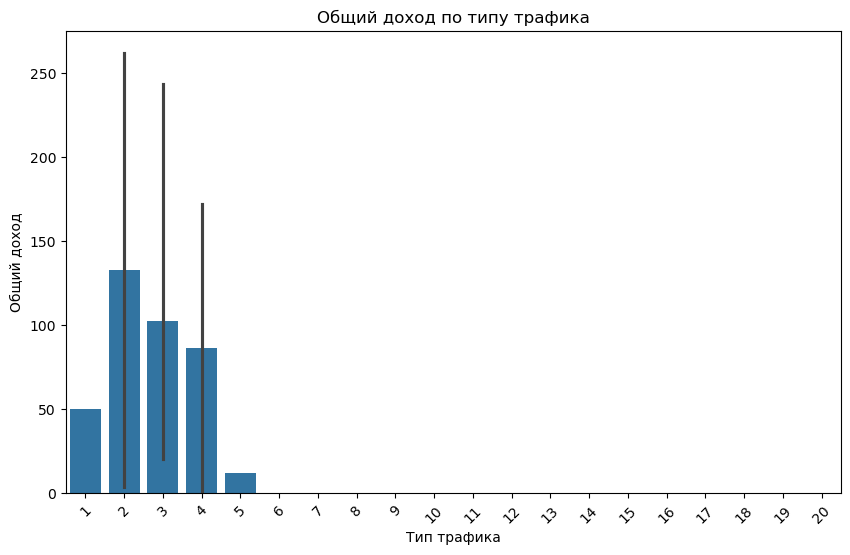

In [45]:
# Сортировка таблицы данных сравнения доходов в порядке убывания на основе метрики дохода
revenue_comparison.sort_values(by='Total Revenue', ascending=False, inplace=True)

# Визуализация отсортированных данных
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_comparison, x=df['TrafficType'], y='Total Revenue')
plt.title('Общий доход по типу трафика')
plt.xlabel('Тип трафика')
plt.ylabel('Общий доход')
plt.xticks(rotation=45)
plt.show()

In [47]:
#трафик 2 и 3 типа показали самый высокий доход

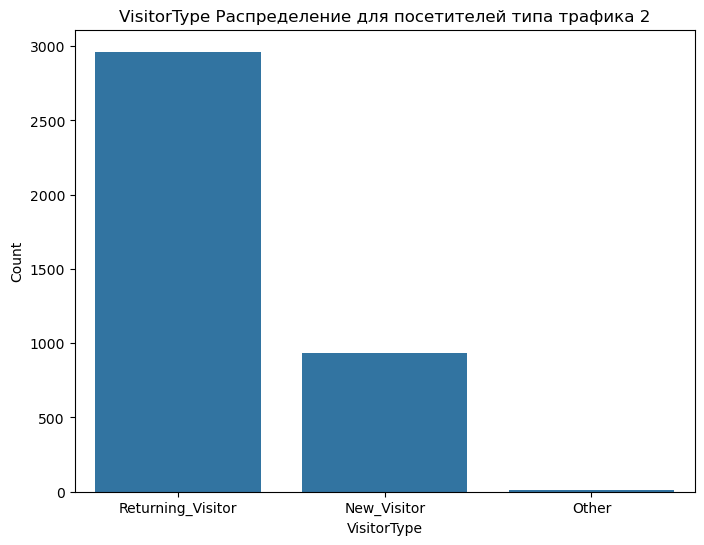

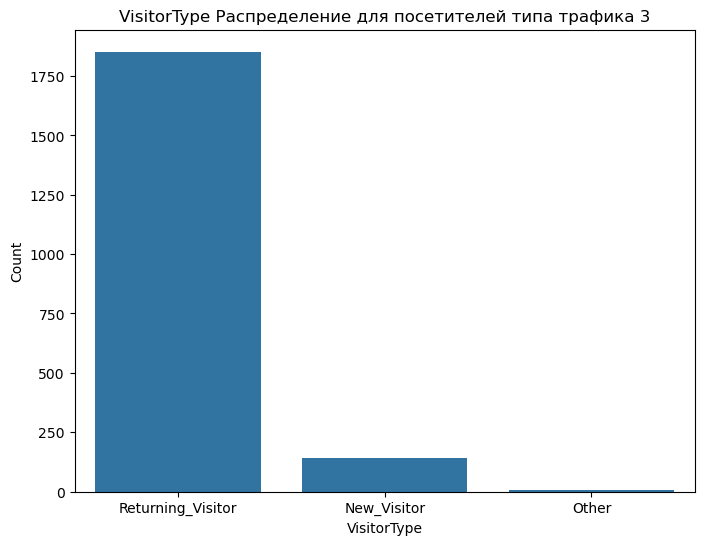

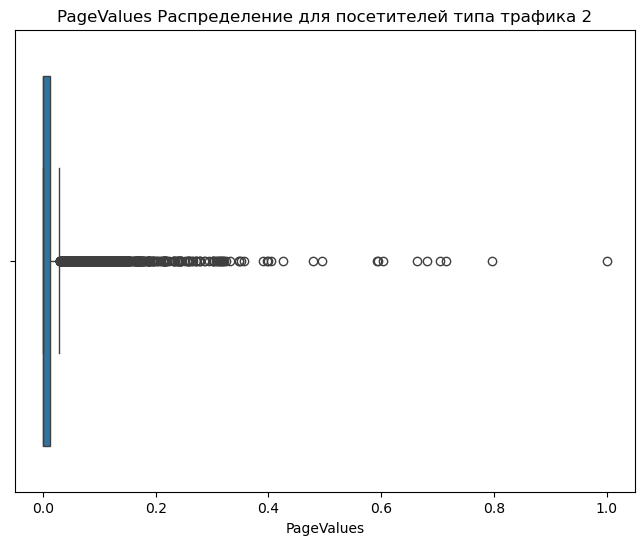

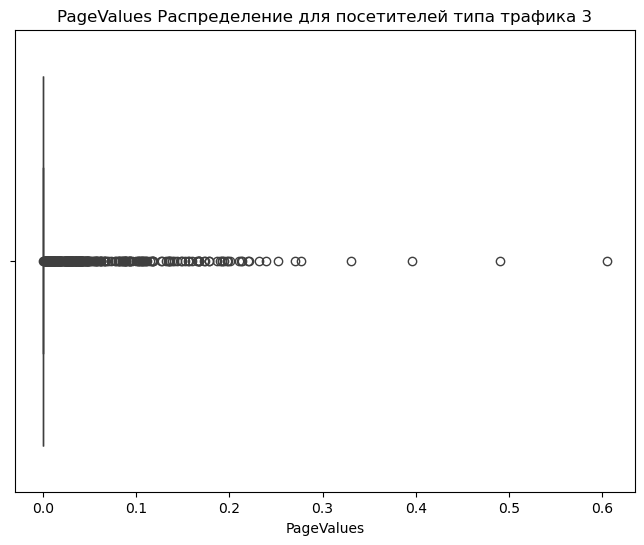

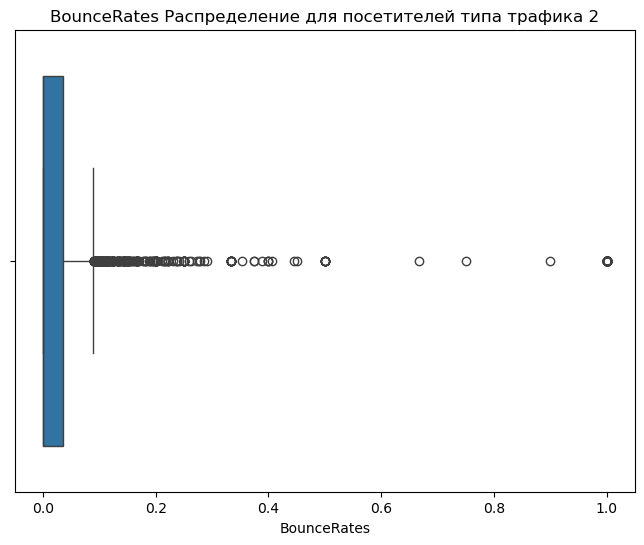

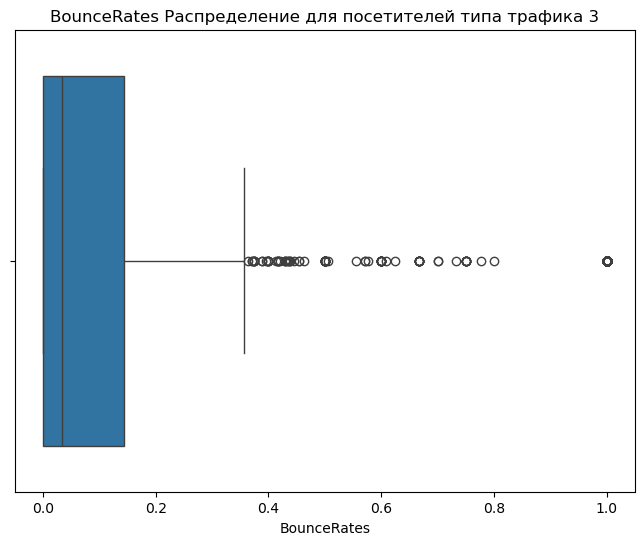

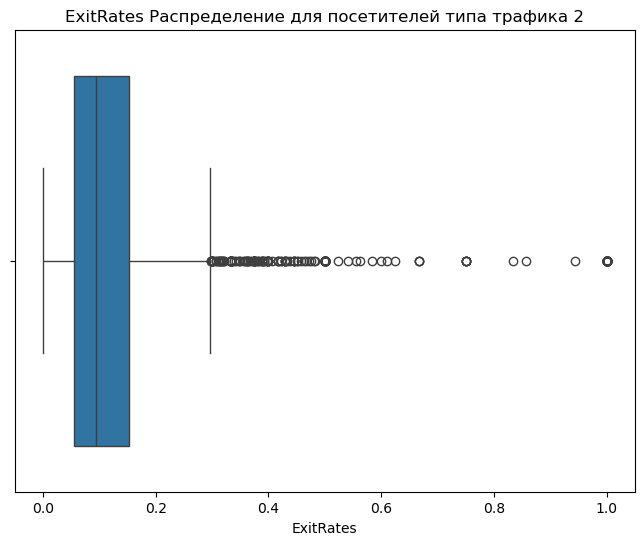

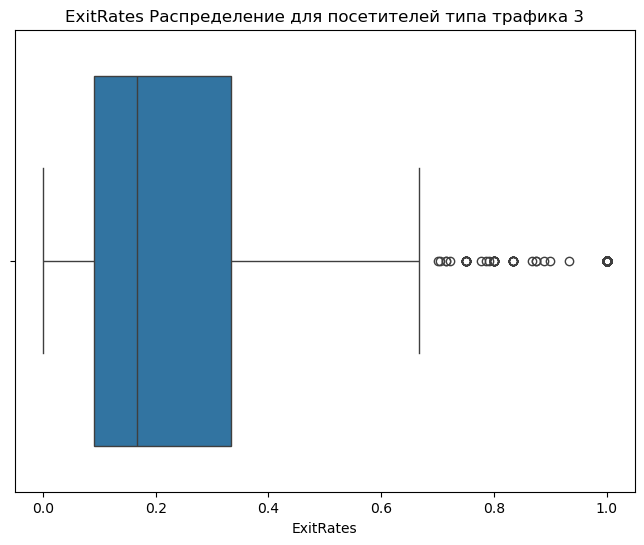

In [49]:
# Фильтрация набора данных для посетителей типа трафика 2
traffic_type_2_data = df[df['TrafficType'] == 2]

# Фильтрация набора данных для посетителей типа трафика 3
traffic_type_3_data = df[df['TrafficType'] == 3]

# Анализ типа посещений
type_variables = ['VisitorType']

for variable in type_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=traffic_type_2_data, x=variable)
    plt.title(f'{variable} Распределение для посетителей типа трафика 2')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.countplot(data=traffic_type_3_data, x=variable)
    plt.title(f'{variable} Распределение для посетителей типа трафика 3')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

# Поведенческий анализ
behavioral_variables = ['PageValues', 'BounceRates', 'ExitRates']

for variable in behavioral_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=traffic_type_2_data, x=variable)
    plt.title(f'{variable} Распределение для посетителей типа трафика 2')
    plt.xlabel(variable)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=traffic_type_3_data, x=variable)
    plt.title(f'{variable} Распределение для посетителей типа трафика 3')
    plt.xlabel(variable)
    plt.show()

In [50]:
#Из анализа типа посетителей видно что основной трафик генерируют повторные посещения при чем преобладает трафик второго типа.
#Из поведенческого анализа следует что пользователи 2 типа трафика генерируют большее количество посещений при этом показатели отказов и выходов ниже

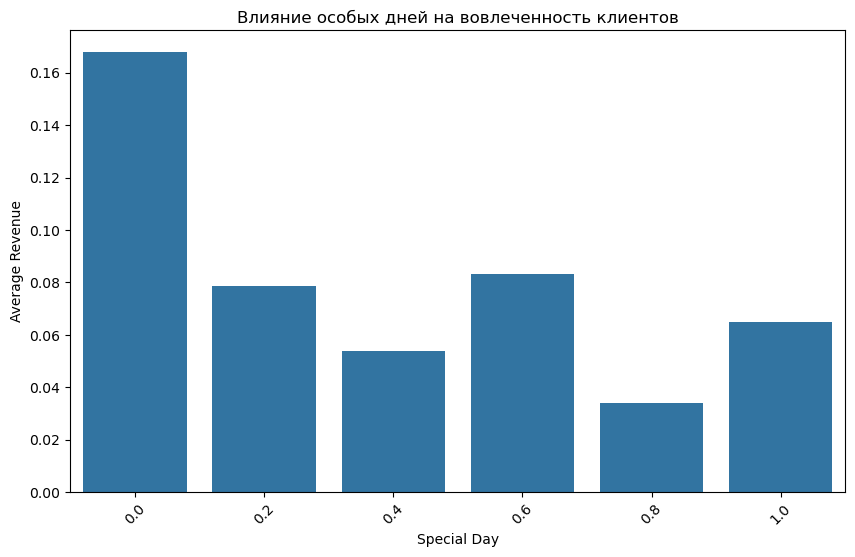

Особые дни с наибольшим влиянием на вовлеченность клиентов:
- 0.0: 0.16779692082111436
- 0.6: 0.0830945558739255
- 0.2: 0.07865168539325842


In [53]:
# Сгруппируем данные  'SpecialDay' and calculate the average revenue or visitor count
special_day_analysis = df.groupby('SpecialDay')['Revenue'].mean()  # Заменим 'Revenue' на соответствующую метрику

# Сортируем данные в порядке убывания на основе среднего дохода или количества посетителей
special_day_analysis = special_day_analysis.sort_values(ascending=False)

# Визуализируем влияние особых дней на вовлеченность клиентов
plt.figure(figsize=(10, 6))
sns.barplot(x=special_day_analysis.index, y=special_day_analysis.values)
plt.title("Влияние особых дней на вовлеченность клиентов")
plt.xlabel("Special Day")
plt.ylabel("Average Revenue" ) 
plt.xticks(rotation=45)
plt.show()

# Определите особые дни с наибольшим влиянием на вовлеченность клиентов
top_special_days = special_day_analysis.head(3)  # Выберем 3 дня

print("Особые дни с наибольшим влиянием на вовлеченность клиентов:")
for day, impact in top_special_days.items():
    print(f"- {day}: {impact}")

<Axes: >

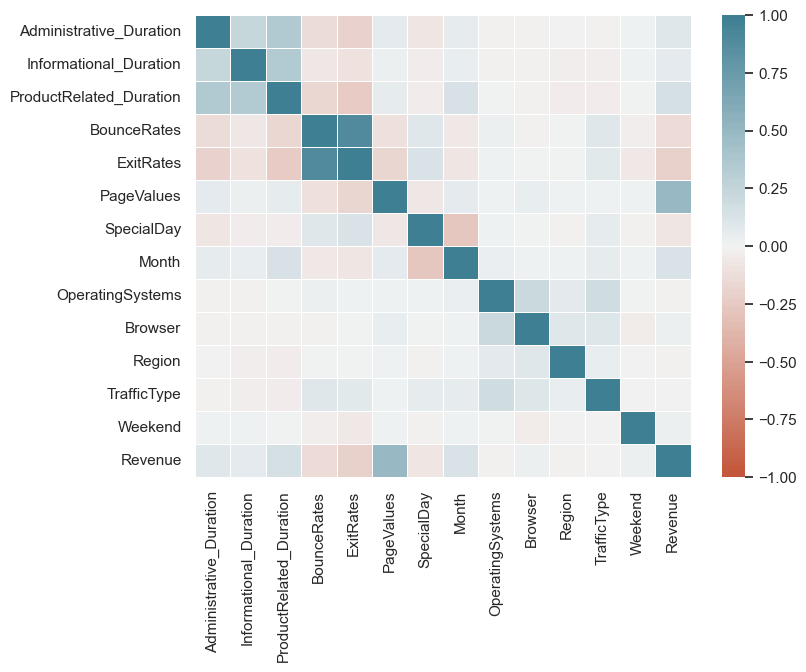

In [54]:
numerical=df.describe().columns
corr=df[numerical].corr()
sns.set(style='white')
plt.figure(figsize=(8, 6))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), linewidths=0.5)

In [ ]:
#Из приведенной выше матрицы корреляции набора данных онлайн-покупателей мы можем заметить, что:
#Поля «ExitRates» и «BounceRates» умеренно коррелируют, что имеет смысл, поскольку обе связаны с посетителем, покидающим веб-сайт.
#Поле «PageValues» слабо коррелирует с другими функциями, что говорит о том, что она может не оказывать сильного влияния на прогнозирование того, 
#совершит ли посетитель покупку или нет.

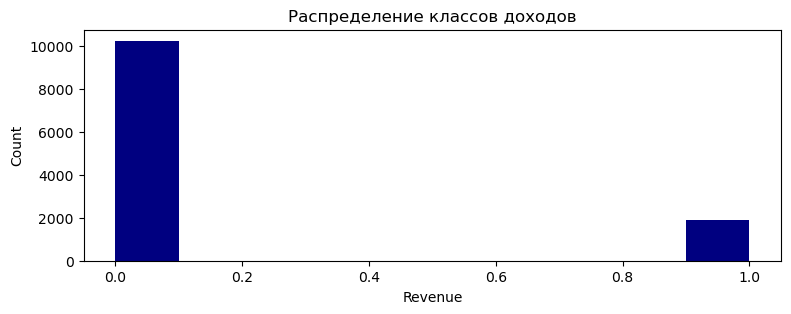

In [55]:
plt.figure(figsize=(9, 3))
plt.hist(df['Revenue'],color='navy')

plt.title('Распределение классов доходов')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

In [ ]:
#Приведенная визуализация отображает распределение целевой переменной Revenue. Она показывает дизбаланс классов который может привести к не точной модели

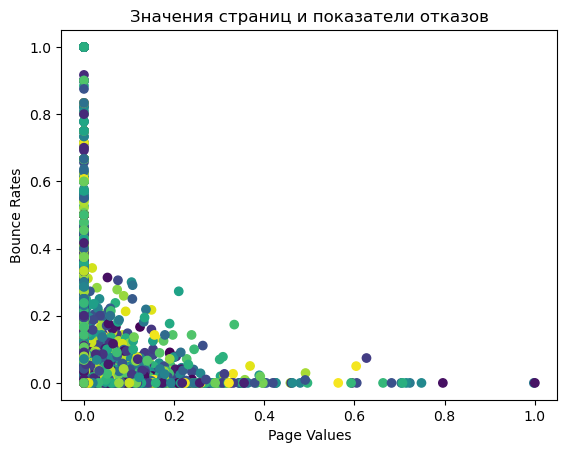

In [57]:
N=len(df)
colors = np.random.rand(N)
plt.scatter(df['PageValues'], df['BounceRates'],c=colors)
plt.title('Значения страниц и показатели отказов')
plt.xlabel('Page Values')
plt.ylabel('Bounce Rates')
plt.show()

In [ ]:
#Мы можем наблюдать на этом графике тенденцию когда более высокие значения страниц имеют большую тенденцию к более низким показателям отказов

In [61]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.001000,0.00,0.50,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.000042,0.25,0.70,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.009809,0.10,0.25,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


In [63]:
df['Revenue'].value_counts()

Revenue
0    10249
1     1908
Name: count, dtype: int64

In [65]:
X=df.drop('Revenue',axis=1)
y=df['Revenue']

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [69]:
y_train.value_counts()

Revenue
0    8199
1    1526
Name: count, dtype: int64

In [71]:
y.value_counts()

Revenue
0    10249
1     1908
Name: count, dtype: int64

In [73]:
y_test.value_counts()

Revenue
0    2050
1     382
Name: count, dtype: int64

In [75]:
X_train.shape

(9725, 14)

In [77]:
X_test.shape

(2432, 14)

In [79]:
X_train[:10]

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
2811,0.000000,0.000000,0.006888,0.078947,0.232456,0.000000,0.4,5,2,5,3,3,Returning_Visitor,0
4466,0.007473,0.000000,0.046246,0.027027,0.109234,0.015693,0.4,5,2,5,2,3,Returning_Visitor,0
10593,0.031543,0.000000,0.008023,0.000000,0.060150,0.048502,0.0,11,2,2,1,10,Returning_Visitor,0
12153,0.000000,0.000000,0.004357,0.142857,0.214286,0.000000,0.0,12,3,2,1,20,New_Visitor,0
8359,0.000000,0.000000,0.018226,0.129630,0.222222,0.000000,0.0,12,2,5,3,1,Returning_Visitor,1
8743,0.042221,0.118853,0.034389,0.041667,0.138327,0.000000,0.0,11,1,1,1,2,Returning_Visitor,1
11400,0.003089,0.103849,0.157014,0.025126,0.115901,0.000000,0.0,12,2,2,1,2,Returning_Visitor,0
8840,0.019247,0.000000,0.029771,0.024242,0.130303,0.000000,0.0,11,1,1,2,8,Returning_Visitor,0
10633,0.000000,0.000000,0.001485,0.333333,0.666667,0.000000,0.0,11,1,1,9,3,Returning_Visitor,0
8426,0.000000,0.000000,0.010872,0.000000,0.500000,0.000000,0.0,11,2,2,4,1,Returning_Visitor,0


In [ ]:
#Для устранения дизбаланса в данных используем библиотеку SMOTE

In [81]:

from imblearn.over_sampling import SMOTE

# Dsgjkybv прямое кодирование категориальных признаков
X_encoded = pd.get_dummies(X)

# Применяем SMOTE к закодированным признакам и целевой переменной
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_encoded, y)

# Преобразуем повторно выбранную целевую переменную в список Pandas
y_sm = pd.Series(y_sm)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [83]:
# Количество классов в обучающей выборке
y_train.value_counts()

Revenue
0    8199
1    8199
Name: count, dtype: int64

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train, y_train)

# Сделаем прогноз на тестовой выборке
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9295121951219513
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2050
           1       0.91      0.96      0.93      2050

    accuracy                           0.93      4100
   macro avg       0.93      0.93      0.93      4100
weighted avg       0.93      0.93      0.93      4100



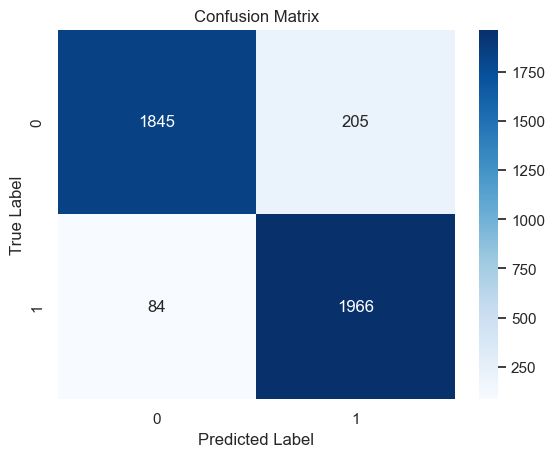

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Построим матрицу ошибок
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [89]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_blobs

In [90]:
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)
y_pred = et.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred)
print('Extra Trees Accuracy:', accuracy_et)

print(f'Accuracy: {accuracy_et}')
print(classification_report(y_test, y_pred))
#Точность

Extra Trees Accuracy: 0.9409756097560975
Accuracy: 0.9409756097560975
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2050
           1       0.92      0.97      0.94      2050

    accuracy                           0.94      4100
   macro avg       0.94      0.94      0.94      4100
weighted avg       0.94      0.94      0.94      4100



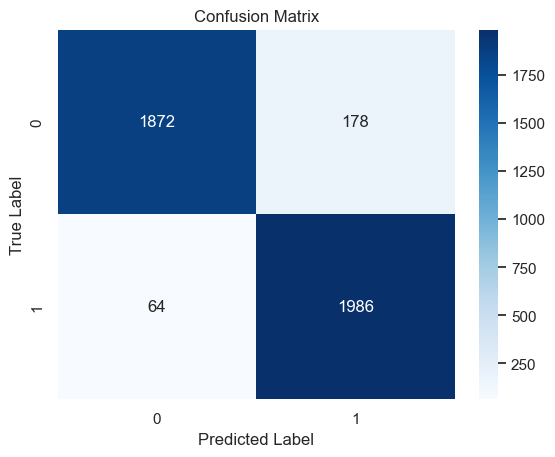

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Строим матрицу ошибок
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#Мы выбрали прогностическую модель ExtraTrees Classfier, поскольку она обеспечивает максимальную точность (около 94%).

In [92]:
df.columns

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
#Мы будем принимать данные от пользователя и прогнозировать, купит ли человек товар или нет.

In [93]:
import pandas as pd
import numpy as np

# Определяем пользовательский ввод как словарь
user_input = {'Administrative_Duration': 50,
              'Informational_Duration': 100,
              'ProductRelated_Duration': 200,
              'BounceRates': 0.05,
              'ExitRates': 0.1,
              'PageValues': 20,
              'SpecialDay': 0,
              'Month': 7,
              'OperatingSystems': 0,
              'Browser': 0,
              'Region': 0,
              'TrafficType': 1,
              'VisitorType': 'New_Visitor',
              'Weekend': 1}

# Создать DataFrame из пользовательского ввода
user_df = pd.DataFrame.from_dict(user_input, orient='index').T

# Сопоставить VisitorType с двоичными столбцами
visitor_type_mapping = {
    'New_Visitor': 1,
    'Other': 0,
    'Returning_Visitor': 0
}
user_df['VisitorType_New_Visitor'] = user_df['VisitorType'].map(visitor_type_mapping)
user_df['VisitorType_Other'] = user_df['VisitorType'].map(visitor_type_mapping)
user_df['VisitorType_Returning_Visitor'] = user_df['VisitorType'].map(visitor_type_mapping)

# Удаляем исходный столбец VisitorType
user_df.drop('VisitorType', axis=1, inplace=True)

# Делаем прогноз для пользовательского ввода
prediction = et.predict(user_df)
print(prediction)


[1]
